In [29]:
import pandas as pd
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
# Download latest version
path = kagglehub.dataset_download("aryan208/financial-transactions-dataset-for-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\DOliv\.cache\kagglehub\datasets\aryan208\financial-transactions-dataset-for-fraud-detection\versions\1


In [3]:
df = pd.read_csv(r'C:\Users\DOliv\.cache\kagglehub\datasets\aryan208\financial-transactions-dataset-for-fraud-detection\versions\1\financial_fraud_detection_dataset.csv')
print(df.head())


  transaction_id                   timestamp sender_account receiver_account  \
0        T100000  2023-08-22T09:22:43.516168      ACC877572        ACC388389   
1        T100001  2023-08-04T01:58:02.606711      ACC895667        ACC944962   
2        T100002  2023-05-12T11:39:33.742963      ACC733052        ACC377370   
3        T100003  2023-10-10T06:04:43.195112      ACC996865        ACC344098   
4        T100004  2023-09-24T08:09:02.700162      ACC584714        ACC497887   

    amount transaction_type merchant_category location device_used  is_fraud  \
0   343.78       withdrawal         utilities    Tokyo      mobile     False   
1   419.65       withdrawal            online  Toronto         atm     False   
2  2773.86          deposit             other   London         pos     False   
3  1666.22          deposit            online   Sydney         pos     False   
4    24.43         transfer         utilities  Toronto      mobile     False   

  fraud_type  time_since_last_transact

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000000 entries, 0 to 4999999
Data columns (total 18 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   transaction_id               object 
 1   timestamp                    object 
 2   sender_account               object 
 3   receiver_account             object 
 4   amount                       float64
 5   transaction_type             object 
 6   merchant_category            object 
 7   location                     object 
 8   device_used                  object 
 9   is_fraud                     bool   
 10  fraud_type                   object 
 11  time_since_last_transaction  float64
 12  spending_deviation_score     float64
 13  velocity_score               int64  
 14  geo_anomaly_score            float64
 15  payment_channel              object 
 16  ip_address                   object 
 17  device_hash                  object 
dtypes: bool(1), float64(4), int64(1), object(1

In [5]:
df.describe()

,amount,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score
count,5.000000e+06,4.103487e+06,5.000000e+06,5.000000e+06,5.000000e+06
mean,3.589343e+02,1.525799e+00,-3.881160e-04,1.050132e+01,5.000293e-01
std,4.699333e+02,3.576569e+03,1.000807e+00,5.766842e+00,2.886349e-01
min,1.000000e-02,-8.777814e+03,-5.260000e+00,1.000000e+00,0.000000e+00
25%,2.657000e+01,-2.562376e+03,-6.800000e-01,5.000000e+00,2.500000e-01
50%,1.386700e+02,8.442747e-01,0.000000e+00,1.100000e+01,5.000000e-01
75%,5.038900e+02,2.568339e+03,6.700000e-01,1.600000e+01,7.500000e-01
max,3.520570e+03,8.757758e+03,5.020000e+00,2.000000e+01,1.000000e+00


In [6]:
df.isnull().sum()

transaction_id                       0
timestamp                            0
sender_account                       0
receiver_account                     0
amount                               0
transaction_type                     0
merchant_category                    0
location                             0
device_used                          0
is_fraud                             0
fraud_type                     4820447
time_since_last_transaction     896513
spending_deviation_score             0
velocity_score                       0
geo_anomaly_score                    0
payment_channel                      0
ip_address                           0
device_hash                          0
dtype: int64

In [43]:
df.tail(40)

,transaction_id,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,fraud_type,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash
4999960,T5099960,2023-03-16T14:18:54.218753,ACC776262,ACC887133,60.64,payment,online,Sydney,pos,False,NaN,-1502.393664,0.54,20,0.89,ACH,103.36.9.32,D1895668
4999961,T5099961,2023-03-19T09:04:04.361565,ACC173562,ACC549071,6.23,transfer,travel,Sydney,pos,False,NaN,-3814.416823,-2.27,7,0.24,card,83.11.41.69,D9247181
4999962,T5099962,2023-07-15T12:40:49.374131,ACC577750,ACC162302,42.15,transfer,utilities,Berlin,mobile,False,NaN,-2607.630937,-0.43,16,0.24,UPI,113.168.223.150,D4562260
4999963,T5099963,2023-09-08T00:32:10.020391,ACC241402,ACC525022,453.26,deposit,retail,Dubai,web,False,NaN,1897.345316,0.75,8,0.98,ACH,7.245.216.30,D8389963
4999964,T5099964,2023-07-09T15:38:14.541180,ACC429467,ACC848286,21.25,transfer,grocery,Toronto,web,False,NaN,906.603806,-0.72,3,0.49,ACH,61.190.49.73,D3939140
4999965,T5099965,2023-05-14T15:23:11.975912,ACC671626,ACC829524,83.96,payment,restaurant,Dubai,web,False,NaN,-3569.907892,0.38,19,0.14,card,173.183.139.228,D2569906
4999966,T5099966,2023-04-20T16:06:45.861113,ACC995598,ACC830774,1785.69,deposit,other,Sydney,pos,False,NaN,-5558.039159,0.86,5,0.65,wire_transfer,186.116.74.237,D5932712
4999967,T5099967,2023-03-13T07:39:44.460939,ACC834167,ACC604657,52.56,payment,online,Berlin,mobile,False,NaN,-1748.555174,-1.36,11,0.55,wire_transfer,68.67.2.208,D1897038
4999968,T5099968,2023-06-22T09:03:15.851275,ACC615496,ACC212539,14.38,transfer,utilities,Dubai,mobile,False,NaN,3763.109920,-0.81,13,0.54,UPI,32.138.35.119,D7543474
4999969,T5099969,2023-12-23T09:09:59.015940,ACC661732,ACC646039,546.61,withdrawal,other,Sydney,pos,False,NaN,439.835309,0.54,14,0.84,ACH,115.50.27.200,D3087768


In [12]:
df['is_fraud'].unique()

array([False,  True])

In [ ]:
print(df['location'].value_counts())
print(df['location'].unique())

location
Tokyo        625994
New York     625354
Singapore    625313
Berlin       625289
Sydney       625125
Toronto      624349
Dubai        624320
London       624256
Name: count, dtype: int64
['Tokyo' 'Toronto' 'London' 'Sydney' 'Berlin' 'Dubai' 'New York'
 'Singapore']


In [10]:
df_stud = df.copy()

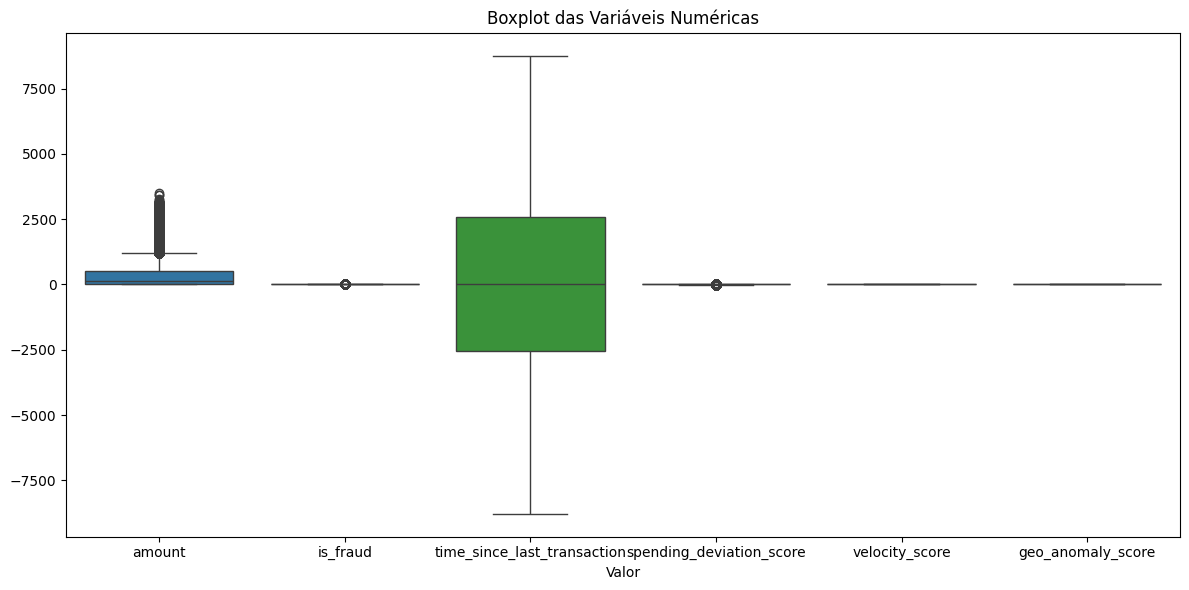

In [11]:
# Criar o boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_stud, orient="v")
plt.title("Boxplot das Variáveis Numéricas")
plt.xlabel("Valor")
plt.tight_layout()

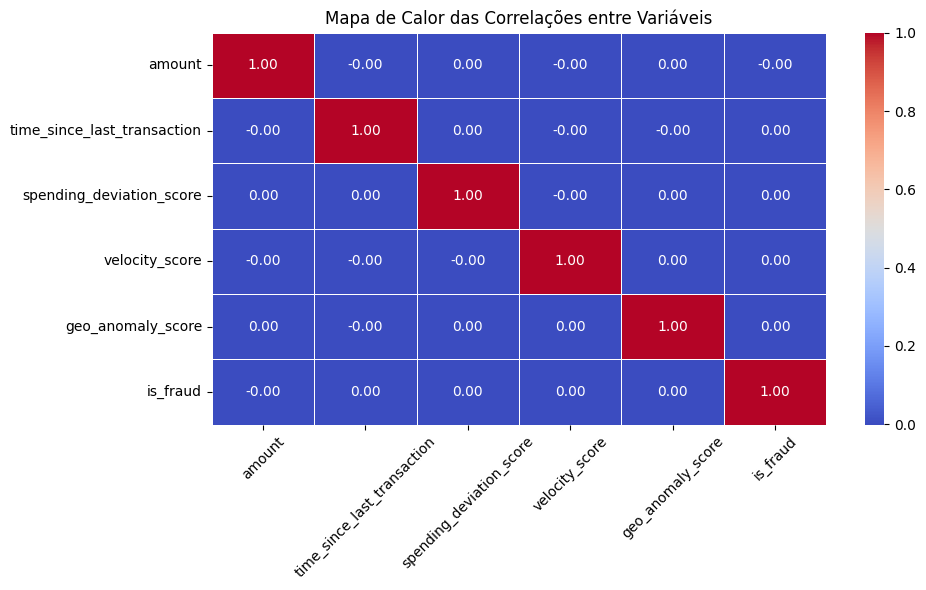

In [23]:
# Converter coluna booleana para inteiro (caso ainda não esteja)
df_stud['is_fraud'] = df_stud['is_fraud'].astype(int)

# Selecionar colunas relevantes
cols = ['amount', 'time_since_last_transaction', 'spending_deviation_score',
        'velocity_score', 'geo_anomaly_score', 'is_fraud']

# Garantir que são todas numéricas
df_numeric = df_stud[cols].apply(pd.to_numeric, errors='coerce')

# Remover linhas com valores ausentes
df_clean = df_numeric.dropna()

# Calcular a matriz de correlação
correlation_matrix = df_clean.corr(method='spearman')

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [40]:
df_test = df.copy()

In [42]:
df_test['time_since_last_transaction'].notnull()

0          False
1          False
2          False
3          False
4          False
           ...  
4999995     True
4999996     True
4999997     True
4999998     True
4999999     True
Name: time_since_last_transaction, Length: 5000000, dtype: bool

In [15]:
df_stud['timestamp'] = pd.to_datetime(df_stud['timestamp'], errors='coerce')
df_stud['month'] = df_stud['timestamp'].dt.month
df_stud['month'].value_counts()

month
8.0     425546
3.0     425454
10.0    424906
1.0     424718
12.0    424558
7.0     424492
5.0     423451
9.0     411277
11.0    411100
4.0     411054
6.0     410890
2.0     382551
Name: count, dtype: int64

In [16]:
print(df_stud.dtypes)


transaction_id                         object
timestamp                      datetime64[ns]
sender_account                         object
receiver_account                       object
amount                                float64
transaction_type                       object
merchant_category                      object
location                               object
device_used                            object
is_fraud                                int64
fraud_type                             object
time_since_last_transaction           float64
spending_deviation_score              float64
velocity_score                          int64
geo_anomaly_score                     float64
payment_channel                        object
ip_address                             object
device_hash                            object
month                                 float64
dtype: object


Codificando colunas categóricas: 100%|██████████| 12/12 [00:06<00:00,  1.75it/s]


Treinando modelo...


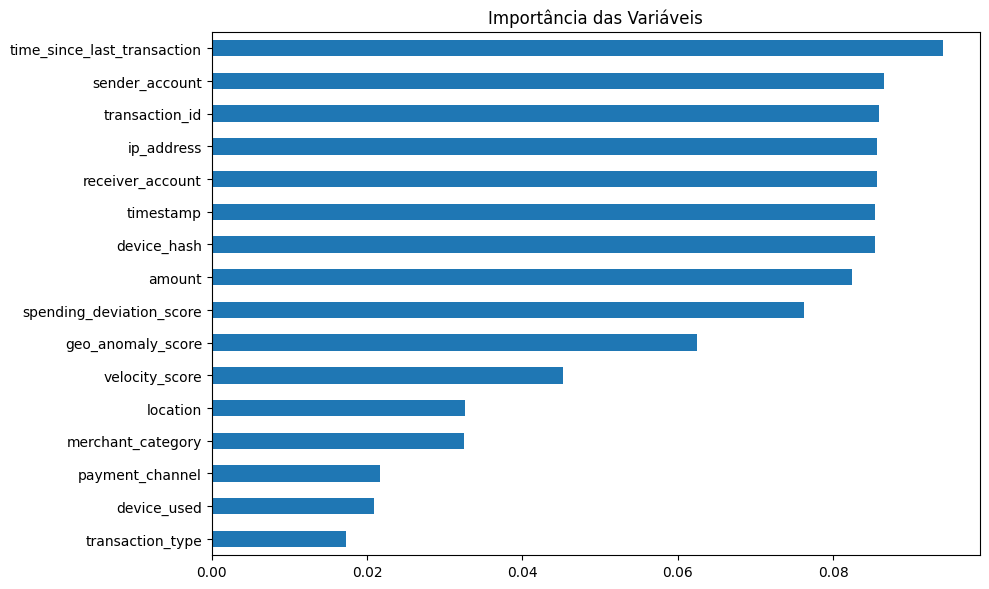

In [32]:
# Barra de progresso nas transformações
tqdm.pandas()

df_import = df.copy()

# Limitar dados para acelerar (opcional: use 50 mil ao invés de 5 milhões)
df_import = df_import.sample(n=500000, random_state=42)

# Label Encoding nas colunas categóricas
for col in tqdm(df_import.select_dtypes(include='object').columns, desc="Codificando colunas categóricas"):
    df_import[col] = LabelEncoder().fit_transform(df_import[col].astype(str))

# Separar variáveis e target
X = df_import.drop(columns=['is_fraud', 'fraud_type'])  # <- Remova ela
y = df_import['is_fraud']

# Separar em treino e teste (evita treinar em tudo)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Treinar modelo
print("Treinando modelo...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)  # n_jobs=-1 usa todos os núcleos
model.fit(X_train, y_train)

# Gerar gráfico de importância
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(10, 6), title="Importância das Variáveis")
plt.tight_layout()
plt.show()

#tratamento de dados

In [33]:
# Copiar dataset original
df_clean = df.copy()

# 1. Converter 'timestamp' em datetime
df_clean['timestamp'] = pd.to_datetime(df_clean['timestamp'], errors='coerce')

# 2. Remover colunas que causam vazamento ou não ajudam
cols_to_drop = ['fraud_type', 'transaction_id']
df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns], inplace=True)

# 3. Criar colunas derivadas de timestamp
df_clean['hour'] = df_clean['timestamp'].dt.hour
df_clean['weekday'] = df_clean['timestamp'].dt.dayofweek
df_clean['is_weekend'] = df_clean['weekday'].isin([5, 6]).astype(int)

# 4. Tratar colunas categóricas
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_clean[col] = LabelEncoder().fit_transform(df_clean[col].astype(str))

# 5. Tratar colunas booleanas
bool_cols = df_clean.select_dtypes(include='bool').columns
for col in bool_cols:
    df_clean[col] = df_clean[col].astype(int)

# 6. Remover registros com valores nulos após conversões
df_clean.dropna(inplace=True)

# 7. Redefinir o índice
df_clean.reset_index(drop=True, inplace=True)

# Visualização rápida
print("Shape final do df_clean:", df_clean.shape)
df_clean.head()

Shape final do df_clean: (4103484, 19)


,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,hour,weekday,is_weekend
0,2023-04-25 14:30:25.650085,318972,122138,318.12,3,4,6,2,0,-4797.552868,-0.94,16,0.64,1,4762390,1003410,14.0,1.0,0
1,2023-08-17 01:49:02.932894,657322,332585,25.03,2,2,1,2,0,3705.738348,-0.56,1,0.48,0,4775190,1683944,1.0,3.0,0
2,2023-12-28 23:55:39.204732,599909,556504,5.33,2,2,7,2,0,2158.906433,0.77,7,0.18,0,755084,3531274,23.0,3.0,0
3,2023-08-18 09:45:10.418894,715249,743690,261.11,1,0,6,0,0,-71.393848,0.43,12,0.41,3,1906581,1637725,9.0,4.0,0
4,2023-10-30 09:22:52.049953,192880,338825,28.61,2,5,2,2,0,1400.413482,-1.48,18,0.53,1,2929933,2602208,9.0,0.0,0


In [39]:
df_clean.head(40)

,timestamp,sender_account,receiver_account,amount,transaction_type,merchant_category,location,device_used,is_fraud,time_since_last_transaction,spending_deviation_score,velocity_score,geo_anomaly_score,payment_channel,ip_address,device_hash,hour,weekday,is_weekend,weekday_name
0,2023-04-25 14:30:25.650085,318972,122138,318.12,3,4,6,2,0,-4797.552868,-0.94,16,0.64,1,4762390,1003410,14.0,1.0,0,Ter
1,2023-08-17 01:49:02.932894,657322,332585,25.03,2,2,1,2,0,3705.738348,-0.56,1,0.48,0,4775190,1683944,1.0,3.0,0,Qui
2,2023-12-28 23:55:39.204732,599909,556504,5.33,2,2,7,2,0,2158.906433,0.77,7,0.18,0,755084,3531274,23.0,3.0,0,Qui
3,2023-08-18 09:45:10.418894,715249,743690,261.11,1,0,6,0,0,-71.393848,0.43,12,0.41,3,1906581,1637725,9.0,4.0,0,Sex
4,2023-10-30 09:22:52.049953,192880,338825,28.61,2,5,2,2,0,1400.413482,-1.48,18,0.53,1,2929933,2602208,9.0,0.0,0,Seg
5,2023-04-25 05:54:45.827541,581275,576557,2.84,1,7,0,3,0,510.096320,-0.21,7,0.59,2,3459275,1922598,5.0,1.0,0,Ter
6,2023-08-10 11:50:17.593819,141236,673733,15.90,1,3,6,3,0,-1109.665412,0.60,12,0.56,3,1680255,420996,11.0,3.0,0,Qui
7,2023-07-06 07:43:49.783927,510065,57486,581.26,3,3,4,1,0,4143.702563,0.61,1,0.54,2,1581320,3405051,7.0,3.0,0,Qui
8,2023-10-19 16:18:51.596136,506276,371263,550.09,0,5,1,2,0,4691.861768,-0.91,16,0.09,0,4564323,348359,16.0,3.0,0,Qui
9,2023-02-18 18:09:36.077866,712335,635110,698.17,0,4,1,1,0,-955.066341,0.85,20,0.27,2,4824541,2586615,18.0,5.0,1,Sáb


tratamento apos limpesa dos dados

In [34]:
# Calcular matriz de correlação
correlation_matrix = df_clean.corr()

# Visualizar as 10 variáveis mais correlacionadas com is_fraud
correlation_matrix['is_fraud'].sort_values(ascending=False).head(10)


is_fraud                    1.000000
is_weekend                  0.000855
weekday                     0.000779
timestamp                   0.000736
transaction_type            0.000676
payment_channel             0.000370
velocity_score              0.000364
geo_anomaly_score           0.000314
spending_deviation_score    0.000308
location                    0.000148
Name: is_fraud, dtype: float64

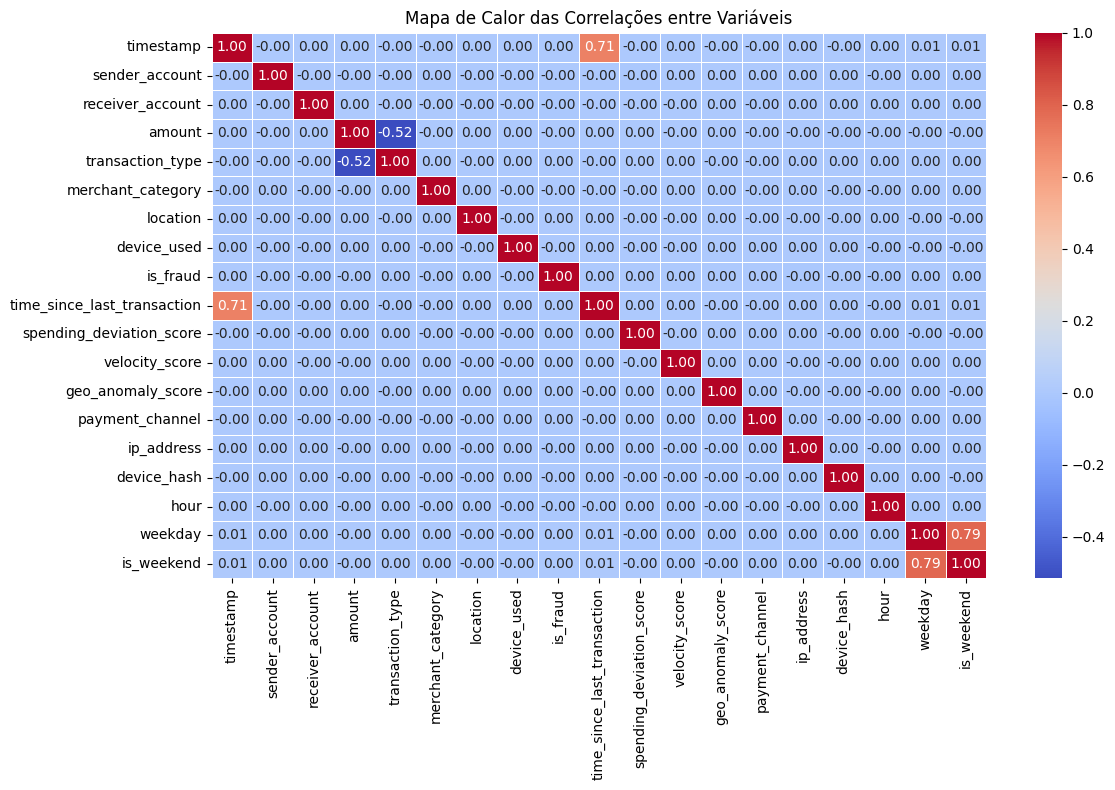

In [35]:

plt.figure(figsize=(12, 8))
sns.heatmap(df_clean.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações entre Variáveis")
plt.tight_layout()
plt.show()


In [36]:

# Separar features e target
X = df_clean.drop(columns=['is_fraud'])
y = df_clean['is_fraud']

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Treinar modelo
model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
model.fit(X_train, y_train)

# Plotar importâncias
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot.barh(figsize=(10, 6), title="Importância das Variáveis")
plt.tight_layout()
plt.show()


DTypePromotionError: The DType <class 'numpy.dtypes.DateTime64DType'> could not be promoted by <class 'numpy.dtypes.Float64DType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.DateTime64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Int64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Float64DType'>, <class 'numpy.dtypes.Int64DType'>)

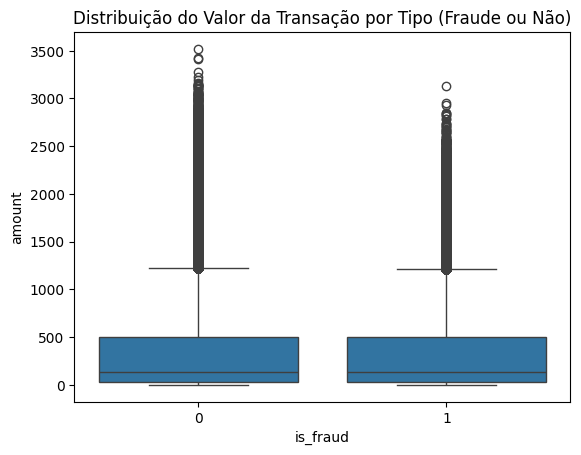

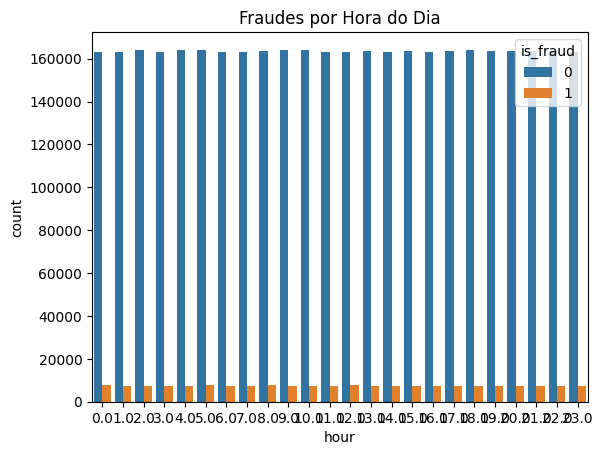

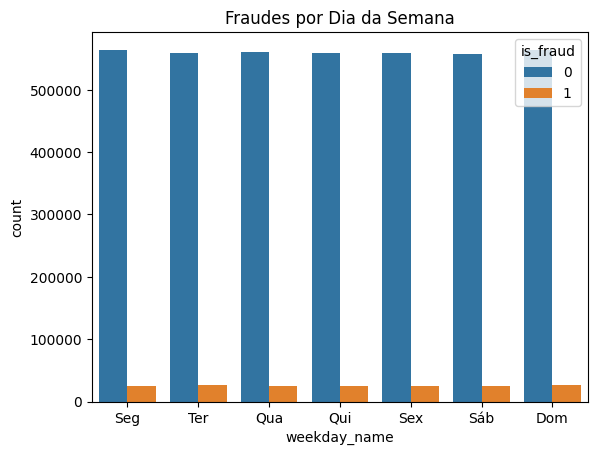

In [37]:
# Distribuição do amount por fraude
sns.boxplot(x='is_fraud', y='amount', data=df_clean)
plt.title("Distribuição do Valor da Transação por Tipo (Fraude ou Não)")
plt.show()

# Fraudes por hora do dia
sns.countplot(x='hour', hue='is_fraud', data=df_clean)
plt.title("Fraudes por Hora do Dia")
plt.show()

# Fraudes por dia da semana
dias = ['Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb', 'Dom']
df_clean['weekday_name'] = df_clean['weekday'].map(dict(enumerate(dias)))

sns.countplot(x='weekday_name', hue='is_fraud', data=df_clean, order=dias)
plt.title("Fraudes por Dia da Semana")
plt.show()
